In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2021-10-28 09:18:14--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-10-28 09:18:14--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.4’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-10-28 09:18:14 (7.46 MB/s) - 

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/fonts/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
font_list = fm.createFontList(['thsarabunnew-webfont.ttf'])
fm.fontManager.ttflist.extend(font_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [ ]:
import pandas as pd

df = pd.read_csv('Prod_Rec.csv')

In [ ]:
df.head(5)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
missing = df.isnull().sum()
print(missing)

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             17
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

In [ ]:
df = df.drop('NONE', 1)
df = df.drop('Timestamp',1)
df = df.fillna(0)
df = df.apply(pd.to_numeric)

In [ ]:
df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,0.0,0.0,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,0.0,0.0,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,0.0,0.0,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,0.0,0.0,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_for_top5_Items= df.sum().sort_values(ascending=False).head(5)



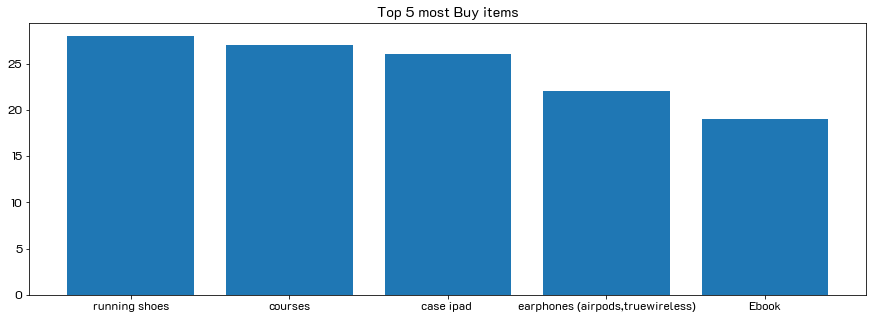

In [ ]:
Item_array= np.arange(len(df_for_top5_Items))

plt.figure(figsize=(15,5))
Items_name=['running shoes','courses','case ipad ','earphones (airpods,truewireless)','Ebook']
plt.bar(Item_array,df_for_top5_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 5 most Buy items')
plt.show()

In [ ]:
df = df.iloc[:,:].reset_index(drop=True).rename_axis('No.')
df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
No.,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,0.0,0.0,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,0.0,0.0,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,0.0,0.0,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,0.0,0.0,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = df.applymap(encode_units)

In [ ]:
hot_encoded_df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
No.,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.5, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
3,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
5,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
6,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
7,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
8,(เครื่องดนตรี),(คอร์สเรียนเสริม),0.551724,0.931034,0.517241,0.937500,1.006944,0.003567,1.103448
9,(คอร์สเรียนเสริม),(เครื่องดนตรี),0.931034,0.551724,0.517241,0.555556,1.006944,0.003567,1.008621


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
3,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
7,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
...,...,...,...,...,...,...,...,...,...
98,"(เคส ipad, คอร์สเรียนเสริม)","(รองเท้าวิ่ง, Ebook)",0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266
100,"(เคส ipad, Ebook)","(รองเท้าวิ่ง, คอร์สเรียนเสริม)",0.620690,0.896552,0.586207,0.944444,1.053419,0.029727,1.862069
102,"(Ebook, คอร์สเรียนเสริม)","(เคส ipad, รองเท้าวิ่ง)",0.620690,0.862069,0.586207,0.944444,1.095556,0.051130,2.482759
103,"(รองเท้าวิ่ง, Ebook)","(เคส ipad, คอร์สเรียนเสริม)",0.655172,0.827586,0.586207,0.894737,1.081140,0.043995,1.637931


In [ ]:
# Recommend 1 item based on 2 items
rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,"(เคส ipad, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
67,"(เคส ipad, คอร์สเรียนเสริม)",(เครื่องดนตรี),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
68,"(คอร์สเรียนเสริม, เครื่องดนตรี)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
39,"(เบาะรองนั่ง, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
56,"(เบาะรองนั่ง, คอร์สเรียนเสริม)",(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
49,"(รองเท้าวิ่ง, เครื่องดนตรี)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
42,"(เคส ipad, รองเท้าวิ่ง)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
38,"(เคส ipad, รองเท้าวิ่ง)",(เบาะรองนั่ง),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
48,"(เคส ipad, รองเท้าวิ่ง)",(เครื่องดนตรี),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
60,"(เคส ipad, คอร์สเรียนเสริม)",(Ebook),0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266


In [ ]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,"(เคส ipad, รองเท้าวิ่ง, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
94,"(เคส ipad, รองเท้าวิ่ง, คอร์สเรียนเสริม)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839
84,"(รองเท้าวิ่ง, เบาะรองนั่ง, คอร์สเรียนเสริม)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
82,"(เคส ipad, รองเท้าวิ่ง, เบาะรองนั่ง)",(คอร์สเรียนเสริม),0.517241,0.931034,0.517241,1.000000,1.074074,0.035672,inf
97,"(Ebook, รองเท้าวิ่ง, คอร์สเรียนเสริม)",(เคส ipad),0.620690,0.896552,0.586207,0.944444,1.053419,0.029727,1.862069
72,"(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",(รองเท้าวิ่ง),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf
95,"(เคส ipad, Ebook, คอร์สเรียนเสริม)",(รองเท้าวิ่ง),0.586207,0.965517,0.586207,1.000000,1.035714,0.020214,inf
73,"(เคส ipad, รองเท้าวิ่ง, คอร์สเรียนเสริม)","(หูฟัง bluetooth (airpods,truewireless))",0.793103,0.758621,0.620690,0.782609,1.031621,0.019025,1.110345
96,"(เคส ipad, รองเท้าวิ่ง, Ebook)",(คอร์สเรียนเสริม),0.620690,0.931034,0.586207,0.944444,1.014403,0.008323,1.241379
74,"(หูฟัง bluetooth (airpods,truewireless), รองเท...",(เคส ipad),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483


In [ ]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] >= 1.0) & (rules['confidence'] > 0.7)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)


(11, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(เบาะรองนั่ง),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
17,(เครื่องดนตรี),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
15,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
3,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
7,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
10,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless))",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
11,"(หูฟัง bluetooth (airpods,truewireless))",(เคส ipad),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931


In [ ]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

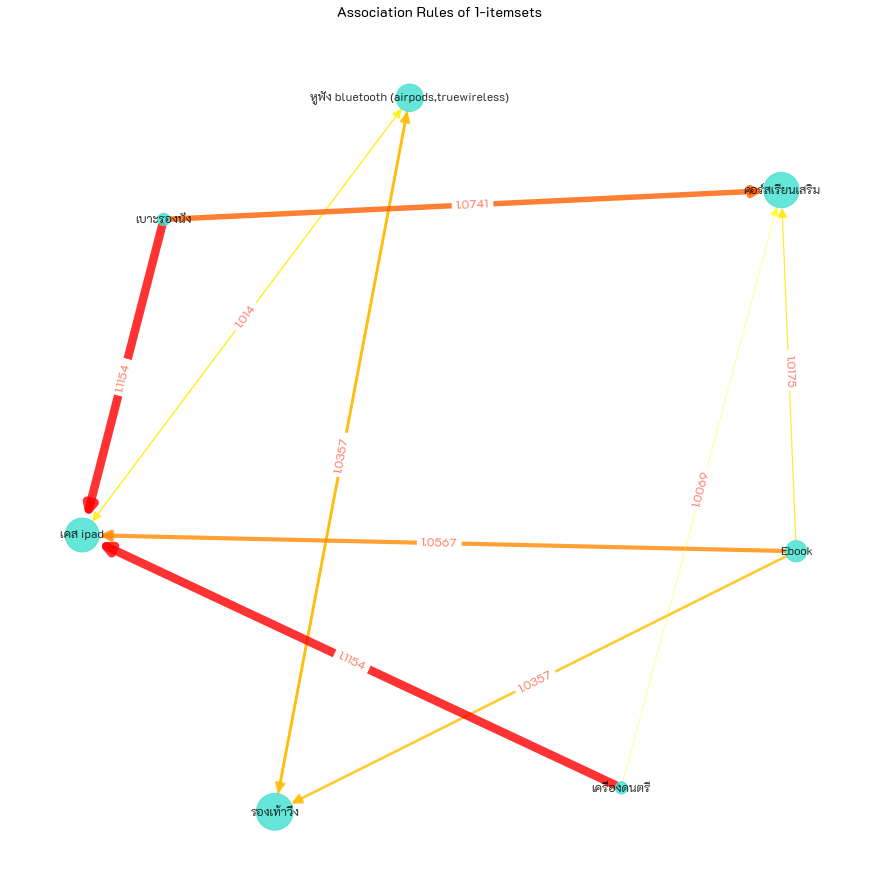

In [ ]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

Graph with 25 nodes and 254 edges


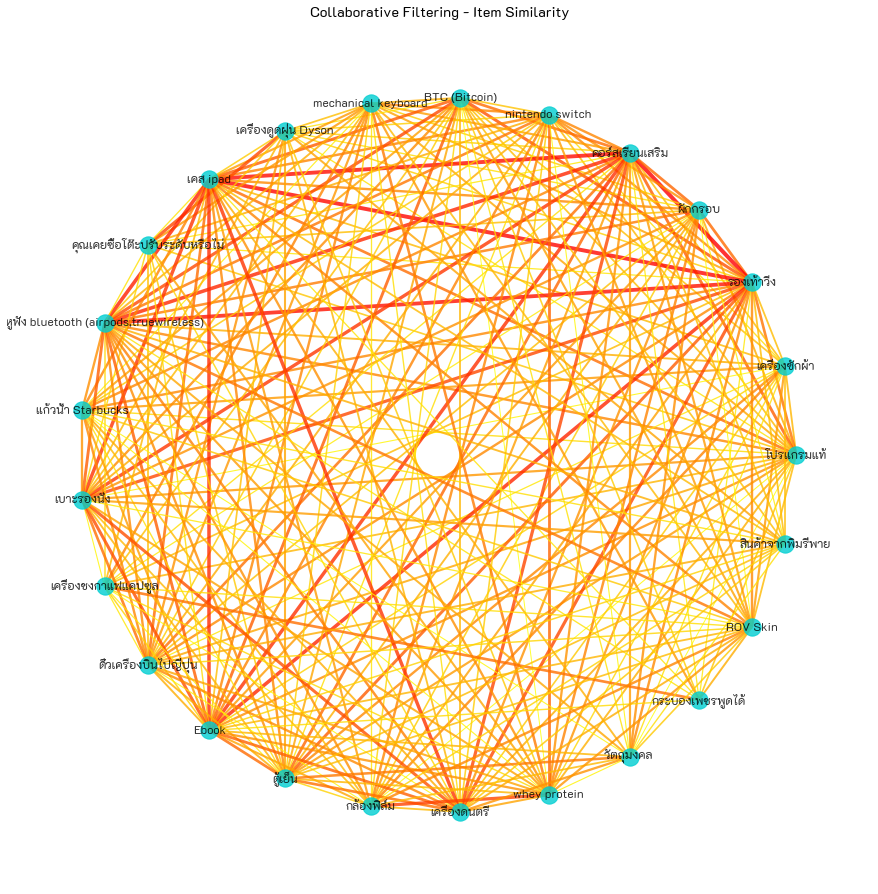

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from([ (x['item'],x['related item'], round(x['value'],2)) for i,x in links_filtered.iterrows()])
print(nx.info(G))
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

edgelist, weights = zip(*[((u,v), d['weight'])for u,v,d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*3

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='darkturquoise', 
        edgelist=edgelist, width=width, 
        edge_color=weights, edge_cmap=plt.cm.autumn_r,
        **labels_params)
plt.title('Collaborative Filtering - Item Similarity')
# plt.savefig('./plots/item_sim.png', dpi=120)
plt.show()

สรุปผล

รองเท้าวิ่งกับหูฟังบลูทูธมักถูกซื้อด้วยกัน 
อีกอย่างที่ถูกซื้อคู่กันเยอะ คือ คอร์สเรียนเสริม	กับ เบาะรองนั่ง 	
ที่ดูไม่คุ้นเคย คือ เครื่องดนตรี กับ เคส ipad 